In [124]:
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as dt
import glob
%matplotlib inline
import matplotlib

## 1. Obtener un xarray dataset. Debe ser similar a datos preprocesados de algún satélite: landsat o sentinel2. Ahora se utilizan datos que no fueron registrados en la db del datacube

## 1b Se utilizan los datos de la ruta:

`/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data`

In [2]:
path = '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/' 

nc_files = [f for f in glob.glob(path + "/LS5*.nc", recursive=True)]

In [3]:
nc_files

['/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/LS5_espa_21_-19_19960312164217000000.nc',
 '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/LS5_espa_21_-19_19960124163902000000.nc',
 '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/LS5_espa_21_-19_19961123165617000000.nc',
 '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/LS5_espa_21_-19_19951121163445000000.nc',
 '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/LS5_espa_21_-19_19950206164648000000.nc',
 '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/LS5_espa_21_-19_19950310164531000000.nc',
 '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/LS5_espa_21_-19_19961107165532000000.nc']

In [4]:
ds_combined_no_chunks = xr.open_mfdataset(path +'/LS5*.nc',
                                          data_vars='minimal', coords='minimal',
                                          combine='by_coords')

Combine nc files

In [92]:
ds_combined_no_chunks

<xarray.Dataset>
Dimensions:   (time: 7, x: 1667, y: 1667)
Coordinates:
  * x         (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * y         (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * time      (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(1, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(1, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(1, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(1, 1667, 1667), meta=np.ndarray>
    swir1     (time, y, x) float32 dask.array<chunksize=(1, 1667, 1667), meta=np.ndarray>
    swir2     (time, y, x) float32 dask.array<chunksize=(1, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(1, 1667, 1667), meta=np.ndarray>
    datase

In [6]:
ds_combined_no_chunks.time

<xarray.DataArray 'time' (time: 7)>
array(['1995-02-06T16:46:48.000000000', '1995-03-10T16:45:31.000000000',
       '1995-11-21T16:34:45.000000000', '1996-01-24T16:39:02.000000000',
       '1996-03-12T16:42:17.000000000', '1996-11-07T16:55:32.000000000',
       '1996-11-23T16:56:17.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [93]:
ds_combined = ds_combined_no_chunks.chunk({'time': -1})

In [94]:
ds_combined

<xarray.Dataset>
Dimensions:   (time: 7, x: 1667, y: 1667)
Coordinates:
  * x         (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * y         (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * time      (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    swir1     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    swir2     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    datase

In [95]:
ds_combined.blue.attrs

OrderedDict([('grid_mapping', 'crs'),
             ('units', 'reflectance'),
             ('long_name', 'Surface Reflectance 0.45-0.52 microns (Blue)'),
             ('alias', 'band_1')])

In [96]:
ds_combined.blue

<xarray.DataArray 'blue' (time: 7, y: 1667, x: 1667)>
dask.array<rechunk-merge, shape=(7, 1667, 1667), dtype=float32, chunksize=(7, 1667, 1667), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Attributes:
    grid_mapping:  crs
    units:         reflectance
    long_name:     Surface Reflectance 0.45-0.52 microns (Blue)
    alias:         band_1

In [97]:
ds_combined.blue.isel(time=3).values

array([[133., 133.,  18., ..., 211., 211., 154.],
       [ 75.,  47.,  75., ..., 211., 209., 154.],
       [133., 105.,  75., ..., 182., 182., 209.],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

## 2b Calcular serie de tiempo

Se utiliza la función `resample` para generar una serie de tiempo. Ver por ejemplo:

https://github.com/CONABIO/antares3-sandbox/blob/master/notebooks/time_series_computation_xarray/time_series_computation_xarray_3.ipynb

In [98]:
ds_combined

<xarray.Dataset>
Dimensions:   (time: 7, x: 1667, y: 1667)
Coordinates:
  * x         (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * y         (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * time      (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    swir1     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    swir2     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    datase

In [99]:
ds_combined['ndvi'] = ((ds_combined.nir-ds_combined.red)/(ds_combined.nir+ds_combined.red))

In [100]:
ds_combined

<xarray.Dataset>
Dimensions:   (time: 7, x: 1667, y: 1667)
Coordinates:
  * x         (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * y         (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * time      (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    swir1     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    swir2     (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(7, 1667, 1667), meta=np.ndarray>
    datase

In [101]:
ds_combined.time.values

array(['1995-02-06T16:46:48.000000000', '1995-03-10T16:45:31.000000000',
       '1995-11-21T16:34:45.000000000', '1996-01-24T16:39:02.000000000',
       '1996-03-12T16:42:17.000000000', '1996-11-07T16:55:32.000000000',
       '1996-11-23T16:56:17.000000000'], dtype='datetime64[ns]')

In [102]:
begin="1995-02-06"

In [103]:
begin_time = datetime.strptime(begin, '%Y-%m-%d')

In [104]:
ts_1 = ds_combined.ndvi.resample(time='80D', 
                                 loffset=begin_time - 
                                 datetime.utcfromtimestamp(ds_combined['time'][0].values.astype(datetime)*1e-9)).nearest().interpolate_na('time')

In [105]:
ts_1

<xarray.DataArray 'ndvi' (time: 9, y: 1667, x: 1667)>
dask.array<transpose, shape=(9, 1667, 1667), dtype=float32, chunksize=(9, 1667, 1667), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1995-02-06 1995-04-27 ... 1996-11-07
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06

In [106]:
ts_1['time']

<xarray.DataArray 'time' (time: 9)>
array(['1995-02-06T00:00:00.000000000', '1995-04-27T00:00:00.000000000',
       '1995-07-16T00:00:00.000000000', '1995-10-04T00:00:00.000000000',
       '1995-12-23T00:00:00.000000000', '1996-03-12T00:00:00.000000000',
       '1996-05-31T00:00:00.000000000', '1996-08-19T00:00:00.000000000',
       '1996-11-07T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1995-02-06 1995-04-27 ... 1996-11-07
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [107]:
start=datetime.now()

times=np.datetime_as_string(ts_1['time'],unit='D')
dframe_ts_1 = ts_1.to_dataframe()
dframe_ts_1=dframe_ts_1.reset_index('time')
dframe_ts_1.index = [dframe_ts_1.index.get_level_values('y'),dframe_ts_1.index.get_level_values('x'),
                     dframe_ts_1.index.map('{0[0]}/{0[1]}'.format)]
dframe_ts_1.index.names = ['y', 'x','y/x']
dframe_ts_1=dframe_ts_1.reset_index('y/x')

end=datetime.now()

/home/madmex_user/.local/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


In [108]:
end-start

datetime.timedelta(0, 195, 517268)

# 3 Compute one feature

`pip3.6 install --user tsfresh`

In [109]:
from tsfresh.feature_extraction import extract_features

In [110]:
param = {'fft_coefficient': [{'coeff':0, 'attr': 'abs'}]}

In [137]:
start1 = datetime.now()
#fft_ps = fft_coefficient(dframe_ts_1, param=param)
fft_coef0_abs_list = extract_features(dframe_ts_1, column_id="y/x", column_sort="time",
                                      default_fc_parameters=param)
end1 = datetime.now()

Feature Extraction: 100%|██████████| 50/50 [05:48<00:00,  6.98s/it]


In [138]:
end1-start1

datetime.timedelta(0, 661, 901920)

In [50]:
#dframe_ts_1 = None
#times = None
#ts_1 = None
#ds_combined = None

In [147]:
fft_coef0_abs_list

variable,"ndvi__fft_coefficient__coeff_0__attr_""abs"""
id,
1476545.0/2027385.0,6.230193
1476545.0/2027415.0,6.686688
1476545.0/2027445.0,6.873225
1476545.0/2027475.0,6.561524
1476545.0/2027505.0,6.545950
1476545.0/2027535.0,6.397337
1476545.0/2027565.0,6.272729
1476545.0/2027595.0,6.428940
1476545.0/2027625.0,6.385083


In [148]:
#fft_coef0_abs_list.reset_index('variable')
fft_coef0_abs_list['y'] = fft_coef0_abs_list.index.get_level_values('id').map(lambda x: float(x.split('/')[0]))
fft_coef0_abs_list['x'] = fft_coef0_abs_list.index.get_level_values('id').map(lambda x: float(x.split('/')[1]))


In [149]:
fft_coef0_abs_list.set_index(['y','x'], inplace=True)

In [150]:
fft_coef0_abs_list = fft_coef0_abs_list.rename(columns={'ndvi__fft_coefficient__coeff_0__attr_"abs"': 'ndvi_fft_coeff_0_abs'})

In [151]:
fft_coef0_abs_list

variable             ndvi_fft_coeff_0_abs
y         x                              
1476545.0 2027385.0              6.230193
          2027415.0              6.686688
          2027445.0              6.873225
          2027475.0              6.561524
          2027505.0              6.545950
          2027535.0              6.397337
          2027565.0              6.272729
          2027595.0              6.428940
          2027625.0              6.385083
          2027655.0              6.462635
          2027685.0              6.398276
          2027715.0              6.429528
          2027745.0              6.185034
          2027775.0              5.585415
          2027805.0              5.776672
          2027835.0              6.631697
          2027865.0              6.896320
          2027895.0              6.462173
          2027925.0              5.973056
          2027955.0              6.128477
          2027985.0              5.909689
          2028015.0              5.556963
          2028045.0              6.140257
          2028075.0              6.212109
          2028105.0              6.153287
          2028135.0              5.833522
          2028165.0              6.109171
          2028195.0              6.393365
          2028225.0              6.319107
          2028255.0              6.638027
...                                   ...
1526525.0 2076495.0              4.990927
          2076525.0              5.077771
          2076555.0              4.263320
          2076585.0              3.195055
          2076615.0              3.332862
          2076645.0              4.124218
          2076675.0              4.819920
          2076705.0              5.839099
          2076735.0              5.343746
          2076765.0              5.507536
          2076795.0              5.687102
          2076825.0              6.034501
          2076855.0              5.153800
          2076885.0              4.340289
          2076915.0              3.785028
          2076945.0              3.830546
          2076975.0              4.152107
          2077005.0              3.978956
          2077035.0              3.968813
          2077065.0              4.582176
          2077095.0              4.948803
          2077125.0              5.168129
          2077155.0              5.338477
          2077185.0              4.984661
          2077215.0              4.651730
          2077245.0              4.710643
          2077275.0              4.713225
          2077305.0              4.649963
          2077335.0              5.056355
          2077365.0              5.149725

[2778889 rows x 1 columns]

In [152]:
new_feature = fft_coef0_abs_list.to_xarray()

In [153]:
matplotlib.rcParams['figure.figsize'] = [12, 8]

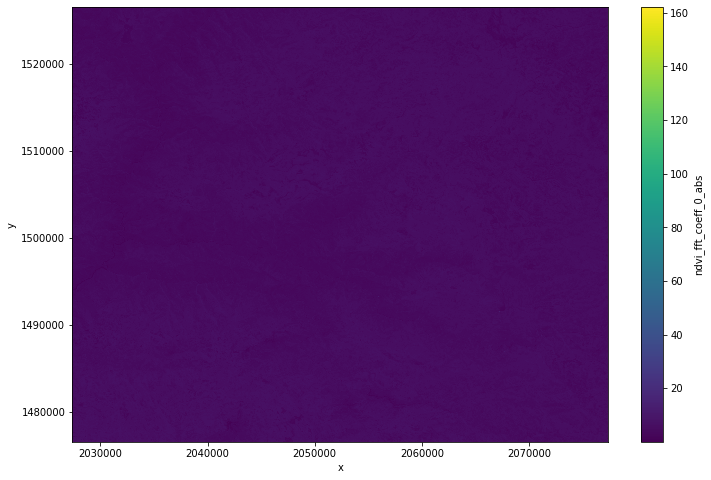

In [154]:
new_feature.ndvi_fft_coeff_0_abs.plot()